In [13]:
class Food(object):
    def __init__(self, n, v, w):
        self.name = n
        self.value = v
        self.calories = w
    
    def getValue(self):
        return self.value
    
    def getCost(self):
        return self.calories
    
    def density(self):
        return self.getValue()/self.getCost()
    
    def __str__(self):
        return self.name + ": <" + str(self.value) + "," + str(self.calories) + " > "

In [14]:

def buildMenu(names, values, calories):
    """names, values, calories lists of same length.
       name a list of strings
       values and calories lists of numbers
       returns list of Foods"""
    menu = []
    for i in range(len(values)):
        menu.append(Food(names[i], values[i],
                          calories[i]))
    return menu


In [15]:

def greedy(items, maxCost, keyFunction):
    """Assumes items a list, maxCost >= 0,
         keyFunction maps elements of items to numbers"""
    itemsCopy = sorted(items, key = keyFunction,
                       reverse = True)
    result = []
    totalValue, totalCost = 0.0, 0.0
    for i in range(len(itemsCopy)):
        if (totalCost+itemsCopy[i].getCost()) <= maxCost:
            result.append(itemsCopy[i])
            totalCost += itemsCopy[i].getCost()
            totalValue += itemsCopy[i].getValue()
    return (result, totalValue)


In [16]:

def testGreedy(items, constraint, keyFunction):
    taken, val = greedy(items, constraint, keyFunction)
    print('Total value of items taken =', val)
    for item in taken:
        print('   ', item)


In [17]:

def testGreedys(foods, maxUnits):
    print('Use greedy by value to allocate', maxUnits,
          'calories')
    testGreedy(foods, maxUnits, Food.getValue)
    print('\nUse greedy by cost to allocate', maxUnits,
          'calories')
    testGreedy(foods, maxUnits,
               lambda x: 1/Food.getCost(x))
    print('\nUse greedy by density to allocate', maxUnits,
          'calories')
    testGreedy(foods, maxUnits, Food.density)



In [18]:

names = ['wine', 'beer', 'pizza', 'burger', 'fries',
         'cola', 'apple', 'donut', 'cake']
values = [89,90,95,100,90,79,50,10]
calories = [123,154,258,354,365,150,95,195]
foods = buildMenu(names, values, calories)
testGreedys(foods, 1000)


Use greedy by value to allocate 1000 calories
Total value of items taken = 424.0
    burger: <100,354 > 
    pizza: <95,258 > 
    beer: <90,154 > 
    wine: <89,123 > 
    apple: <50,95 > 

Use greedy by cost to allocate 1000 calories
Total value of items taken = 413.0
    apple: <50,95 > 
    wine: <89,123 > 
    cola: <79,150 > 
    beer: <90,154 > 
    donut: <10,195 > 
    pizza: <95,258 > 

Use greedy by density to allocate 1000 calories
Total value of items taken = 413.0
    wine: <89,123 > 
    beer: <90,154 > 
    cola: <79,150 > 
    apple: <50,95 > 
    pizza: <95,258 > 
    donut: <10,195 > 


Find data science books and check if they have algorithms inside.
With greedy algoriths u can get stuck at local optimal point not the global optimal

Greedy algorithm.
Brute force algorithm: often not practical. way too long time to computing.


In [19]:
def maxVal(toConsider, avail):
    """Assumes toConsider a list of items, avail a weight
       Returns a tuple of the total value of a solution to the
         0/1 knapsack problem and the items of that solution"""
    if toConsider == [] or avail == 0:
        result = (0, ())
    elif toConsider[0].getCost() > avail:
        #Explore right branch only
        result = maxVal(toConsider[1:], avail)
    else:
        nextItem = toConsider[0]
        #Explore left branch
        withVal, withToTake = maxVal(toConsider[1:],
                                     avail - nextItem.getCost())
        withVal += nextItem.getValue()
        #Explore right branch
        withoutVal, withoutToTake = maxVal(toConsider[1:], avail)
        #Choose better branch
        if withVal > withoutVal:
            result = (withVal, withToTake + (nextItem,))
        else:
            result = (withoutVal, withoutToTake)
    return result

In [20]:

def testMaxVal(foods, maxUnits, printItems = True):
    print('Use search tree to allocate', maxUnits,
          'calories')
    val, taken = maxVal(foods, maxUnits)
    print('Total value of items taken =', val)
    if printItems:
        for item in taken:
            print('   ', item)


In [21]:

names = ['wine', 'beer', 'pizza', 'burger', 'fries',
         'cola', 'apple', 'donut', 'cake']
values = [89,90,95,100,90,79,50,10]
calories = [123,154,258,354,365,150,95,195]
foods = buildMenu(names, values, calories)

testGreedys(foods, 750)
print('')
testMaxVal(foods, 750)

Use greedy by value to allocate 750 calories
Total value of items taken = 284.0
    burger: <100,354 > 
    pizza: <95,258 > 
    wine: <89,123 > 

Use greedy by cost to allocate 750 calories
Total value of items taken = 318.0
    apple: <50,95 > 
    wine: <89,123 > 
    cola: <79,150 > 
    beer: <90,154 > 
    donut: <10,195 > 

Use greedy by density to allocate 750 calories
Total value of items taken = 318.0
    wine: <89,123 > 
    beer: <90,154 > 
    cola: <79,150 > 
    apple: <50,95 > 
    donut: <10,195 > 

Use search tree to allocate 750 calories
Total value of items taken = 353
    cola: <79,150 > 
    pizza: <95,258 > 
    beer: <90,154 > 
    wine: <89,123 > 


# Comment the uncommented code of others to understand better

In [22]:

import random

def buildLargeMenu(numItems, maxVal, maxCost):
    items = []
    for i in range(numItems):
        items.append(Food(str(i),
                          random.randint(1, maxVal),
                          random.randint(1, maxCost)))
    return items

#for numItems in (5, 10, 15, 20, 25, 30, 35, 40, 45):
#    print('Try a menu with', numItems, 'items')
#    items = buildLargeMenu(numItems, 90, 250)
#    testMaxVal(items, 750, False)  

def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)

#for i in range(121):
#    print('fib(' + str(i) + ') =', fib(i))


def fastFib(n, memo = {}):
    """Assumes n is an int >= 0, memo used only by recursive calls
       Returns Fibonacci of n"""
    if n == 0 or n == 1:
        return 1
    try:
        return memo[n]
    except KeyError:
        result = fastFib(n-1, memo) + fastFib(n-2, memo)
        memo[n] = result
        return result

#for i in range(121):
#    print('fib(' + str(i) + ') =', fastFib(i))

def fastMaxVal(toConsider, avail, memo = {}):
    """Assumes toConsider a list of subjects, avail a weight
         memo supplied by recursive calls
       Returns a tuple of the total value of a solution to the
         0/1 knapsack problem and the subjects of that solution"""
    if (len(toConsider), avail) in memo:
        result = memo[(len(toConsider), avail)]
    elif toConsider == [] or avail == 0:
        result = (0, ())
    elif toConsider[0].getCost() > avail:
        #Explore right branch only
        result = fastMaxVal(toConsider[1:], avail, memo)
    else:
        nextItem = toConsider[0]
        #Explore left branch
        withVal, withToTake =\
                 fastMaxVal(toConsider[1:],
                            avail - nextItem.getCost(), memo)
        withVal += nextItem.getValue()
        #Explore right branch
        withoutVal, withoutToTake = fastMaxVal(toConsider[1:],
                                                avail, memo)
        #Choose better branch
        if withVal > withoutVal:
            result = (withVal, withToTake + (nextItem,))
        else:
            result = (withoutVal, withoutToTake)
    memo[(len(toConsider), avail)] = result
    return result

def testMaxVal(foods, maxUnits, algorithm, printItems = True):
    print('Menu contains', len(foods), 'items')
    print('Use search tree to allocate', maxUnits,
          'calories')
    val, taken = algorithm(foods, maxUnits)
    if printItems:
        print('Total value of items taken =', val)
        for item in taken:
            print('   ', item)
          
#for numItems in (5, 10, 15, 20, 25, 30, 35, 40, 45, 50):
#    items = buildLargeMenu(numItems, 90, 250)
#    testMaxVal(items, 750, fastMaxVal, True)

In [23]:
for numItems in (5, 10, 15, 20, 25, 30, 35, 40, 45):
    print('Try a menu with', numItems, 'items')
    items = buildLargeMenu(numItems, 90, 250)
    testMaxVal(items, 750, False) 

Try a menu with 5 items
Menu contains 5 items
Use search tree to allocate 750 calories


TypeError: 'bool' object is not callable

In [24]:
for numItems in (5, 10, 15, 20, 25, 30, 35, 40, 45, 50):
    items = buildLargeMenu(numItems, 90, 250)
    testMaxVal(items, 750, fastMaxVal, True)

Menu contains 5 items
Use search tree to allocate 750 calories
Total value of items taken = 281
    4: <34,234 > 
    3: <61,114 > 
    2: <34,116 > 
    1: <88,161 > 
    0: <64,14 > 
Menu contains 10 items
Use search tree to allocate 750 calories
Total value of items taken = 459
    7: <74,8 > 
    6: <90,121 > 
    4: <74,148 > 
    3: <74,147 > 
    1: <68,124 > 
    0: <79,174 > 
Menu contains 15 items
Use search tree to allocate 750 calories
Total value of items taken = 700
    9: <21,30 > 
    7: <74,8 > 
    6: <90,121 > 
    5: <40,47 > 
    4: <74,148 > 
    8: <34,24 > 
    7: <63,9 > 
    6: <1,18 > 
    5: <34,34 > 
    4: <70,13 > 
    3: <68,17 > 
    2: <59,116 > 
    0: <72,68 > 
Menu contains 20 items
Use search tree to allocate 750 calories
Total value of items taken = 700
    9: <21,30 > 
    7: <74,8 > 
    6: <90,121 > 
    5: <40,47 > 
    4: <74,148 > 
    8: <34,24 > 
    7: <63,9 > 
    6: <1,18 > 
    5: <34,34 > 
    4: <70,13 > 
    3: <68,17 > 
    2: <59,

## 3. Graph-theoretic Models


In [1]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

In [13]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

In [14]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

In [16]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)
    
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago',
                 'Denver', 'Phoenix', 'Los Angeles'): #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [17]:
g = buildCityGraph(Digraph)

In [18]:
print(g)

Boston->Providence
Boston->New York
Providence->Boston
Providence->New York
New York->Chicago
Chicago->Denver
Chicago->Phoenix
Denver->Phoenix
Denver->New York
Los Angeles->Boston


In [20]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result 

def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

In [21]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

testSP('Chicago', 'Boston')
print()
#testSP('Boston', 'Phoenix')
#print()

printQueue = True 

Current DFS path: Chicago
Current DFS path: Chicago->Denver
Current DFS path: Chicago->Denver->Phoenix
Current DFS path: Chicago->Denver->New York
Already visited Chicago
Current DFS path: Chicago->Phoenix
There is no path from Chicago to Boston



In [23]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        if printQueue:
            print('Queue:', len(pathQueue))
            for p in pathQueue:
                print(printPath(p))
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
            print()
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)
    


In [24]:
testSP('Boston', 'Phoenix')

Queue: 1
Boston
Current BFS path: Boston

Queue: 2
Boston->Providence
Boston->New York
Current BFS path: Boston->Providence

Queue: 2
Boston->New York
Boston->Providence->New York
Current BFS path: Boston->New York

Queue: 2
Boston->Providence->New York
Boston->New York->Chicago
Current BFS path: Boston->Providence->New York

Queue: 2
Boston->New York->Chicago
Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago

Queue: 3
Boston->Providence->New York->Chicago
Boston->New York->Chicago->Denver
Boston->New York->Chicago->Phoenix
Current BFS path: Boston->Providence->New York->Chicago

Queue: 4
Boston->New York->Chicago->Denver
Boston->New York->Chicago->Phoenix
Boston->Providence->New York->Chicago->Denver
Boston->Providence->New York->Chicago->Phoenix
Current BFS path: Boston->New York->Chicago->Denver

Queue: 4
Boston->New York->Chicago->Phoenix
Boston->Providence->New York->Chicago->Denver
Boston->Providence->New York->Chicago->Phoenix
Boston->New York->Ch

## Q- Weighted shortest path ?

# Lecture 4 - Stochastic Thinking

In [1]:
import random
 
def rollDie():
    """returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])
 
def testRoll(n = 10):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [4]:
testRoll(5)


25625


In [18]:
random.seed(5)

def runSim(goal, numTrials, txt):
    total = 0
    for i in range(numTrials):
        result = ''
        for j in range(len(goal)):
            result += str(rollDie())
        if result == goal:
            total += 1
    print('Actual probability of', txt, '=',
          round(1/(6**len(goal)), 8)) 
    estProbability = round(total/numTrials, 8)
    print('Estimated Probability of', txt, '=',
          round(estProbability, 8))
    


In [19]:
runSim('11111', 1000, '11111')

Actual probability of 11111 = 0.0001286
Estimated Probability of 11111 = 0.0


Estimated Probability is 0 because after 1000 times of simulation it never find 11111

**random.seed(5) is useful when debugging and when u debug use more than one value of seed so that u see u werent lucky with the first seed.**

In [20]:
runSim('11111', 1000000, '11111')

Actual probability of 11111 = 0.0001286
Estimated Probability of 11111 = 0.000131


In [24]:
def sameDate(numPeople, numSame):
#possibleDates = range(366)
    possibleDates = 4*list(range(0, 57)) + [58]\
                    + 4*list(range(59, 366))\
                    + 4*list(range(180, 270))
    birthdays = [0]*366
    for p in range(numPeople):
        birthDate = random.choice(possibleDates)
        birthdays[birthDate] += 1
    return max(birthdays) >= numSame


In [25]:
def birthdayProb(numPeople, numSame, numTrials):
    numHits = 0
    for t in range(numTrials):
        if sameDate(numPeople, numSame):
            numHits += 1
    return numHits/numTrials

import math

for numPeople in [10, 20, 40, 100]:
    print('For', numPeople,
          'est. prob. of a shared birthday is',
          birthdayProb(numPeople, 2, 10000))
    numerator = math.factorial(366)
    denom = (366**numPeople)*math.factorial(366-numPeople)
    print('Actual prob. for N = 100 =',
          1 - numerator/denom)

For 10 est. prob. of a shared birthday is 0.1253
Actual prob. for N = 100 = 0.1166454118039999
For 20 est. prob. of a shared birthday is 0.4512
Actual prob. for N = 100 = 0.4105696370550831
For 40 est. prob. of a shared birthday is 0.9176
Actual prob. for N = 100 = 0.89054476188945
For 100 est. prob. of a shared birthday is 1.0
Actual prob. for N = 100 = 0.9999996784357714


probabilty of 3 people share same birth day (eventhought this is matematiically not suited code for 3 people- needed different equation than two people share)

In [23]:
for numPeople in [10, 20, 40, 100]:
    print('For', numPeople,
          'est. prob. of a shared birthday is',
          birthdayProb(numPeople, 3, 10000))
    numerator = math.factorial(366)
    denom = (366**numPeople)*math.factorial(366-numPeople)
    print('Actual prob. for N = 100 =',
          1 - numerator/denom)

For 10 est. prob. of a shared birthday is 0.0009
Actual prob. for N = 100 = 0.1166454118039999
For 20 est. prob. of a shared birthday is 0.0075
Actual prob. for N = 100 = 0.4105696370550831
For 40 est. prob. of a shared birthday is 0.0671
Actual prob. for N = 100 = 0.89054476188945
For 100 est. prob. of a shared birthday is 0.643
Actual prob. for N = 100 = 0.9999996784357714


# 5. Random Walks


In [2]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'


In [3]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

In [5]:
import random

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [6]:
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] =\
            self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [11]:
def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))
    
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer,
                                    numSteps), 1))
    return distances

In [12]:
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))

In [13]:
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.296
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.297
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 89.241
 Max = 226.5 Min = 10.0


In [14]:
drunkTest((0, 1, 2), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 2 steps
 Mean = 1.28
 Max = 2.0 Min = 0.0


In [15]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
        
#random.seed(0)
simAll((UsualDrunk, MasochistDrunk),
       (1000, 10000), 100)
#        
#xVals = [1, 2, 3, 4]
#yVals1 = [1, 2, 3, 4]
#pylab.plot(xVals, yVals1, 'b-', label = 'first')
#yVals2 = [1, 7, 3, 5]
#pylab.plot(xVals, yVals2, 'r--', label = 'second')
#pylab.legend()

UsualDrunk random walk of 1000 steps
 Mean = 28.318
 Max = 83.5 Min = 2.0
UsualDrunk random walk of 10000 steps
 Mean = 81.776
 Max = 214.2 Min = 3.2
MasochistDrunk random walk of 1000 steps
 Mean = 57.041
 Max = 109.8 Min = 15.3
MasochistDrunk random walk of 10000 steps
 Mean = 503.508
 Max = 691.1 Min = 353.4


In [17]:
import random, pylab

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

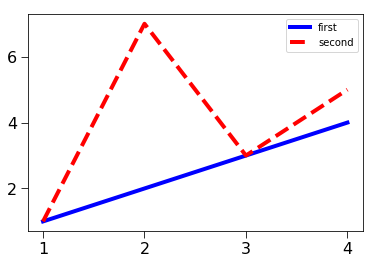

In [18]:
xVals = [1, 2, 3, 4]
yVals1 = [1, 2, 3, 4]
pylab.plot(xVals, yVals1, 'b-', label = 'first')
yVals2 = [1, 7, 3, 5]
pylab.plot(xVals, yVals2, 'r--', label = 'second')
pylab.legend()